In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install openpyxl

In [6]:
#importing data
df=pd.read_excel('./Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.shape

(10683, 11)

In [10]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


<function matplotlib.pyplot.show(close=None, block=None)>

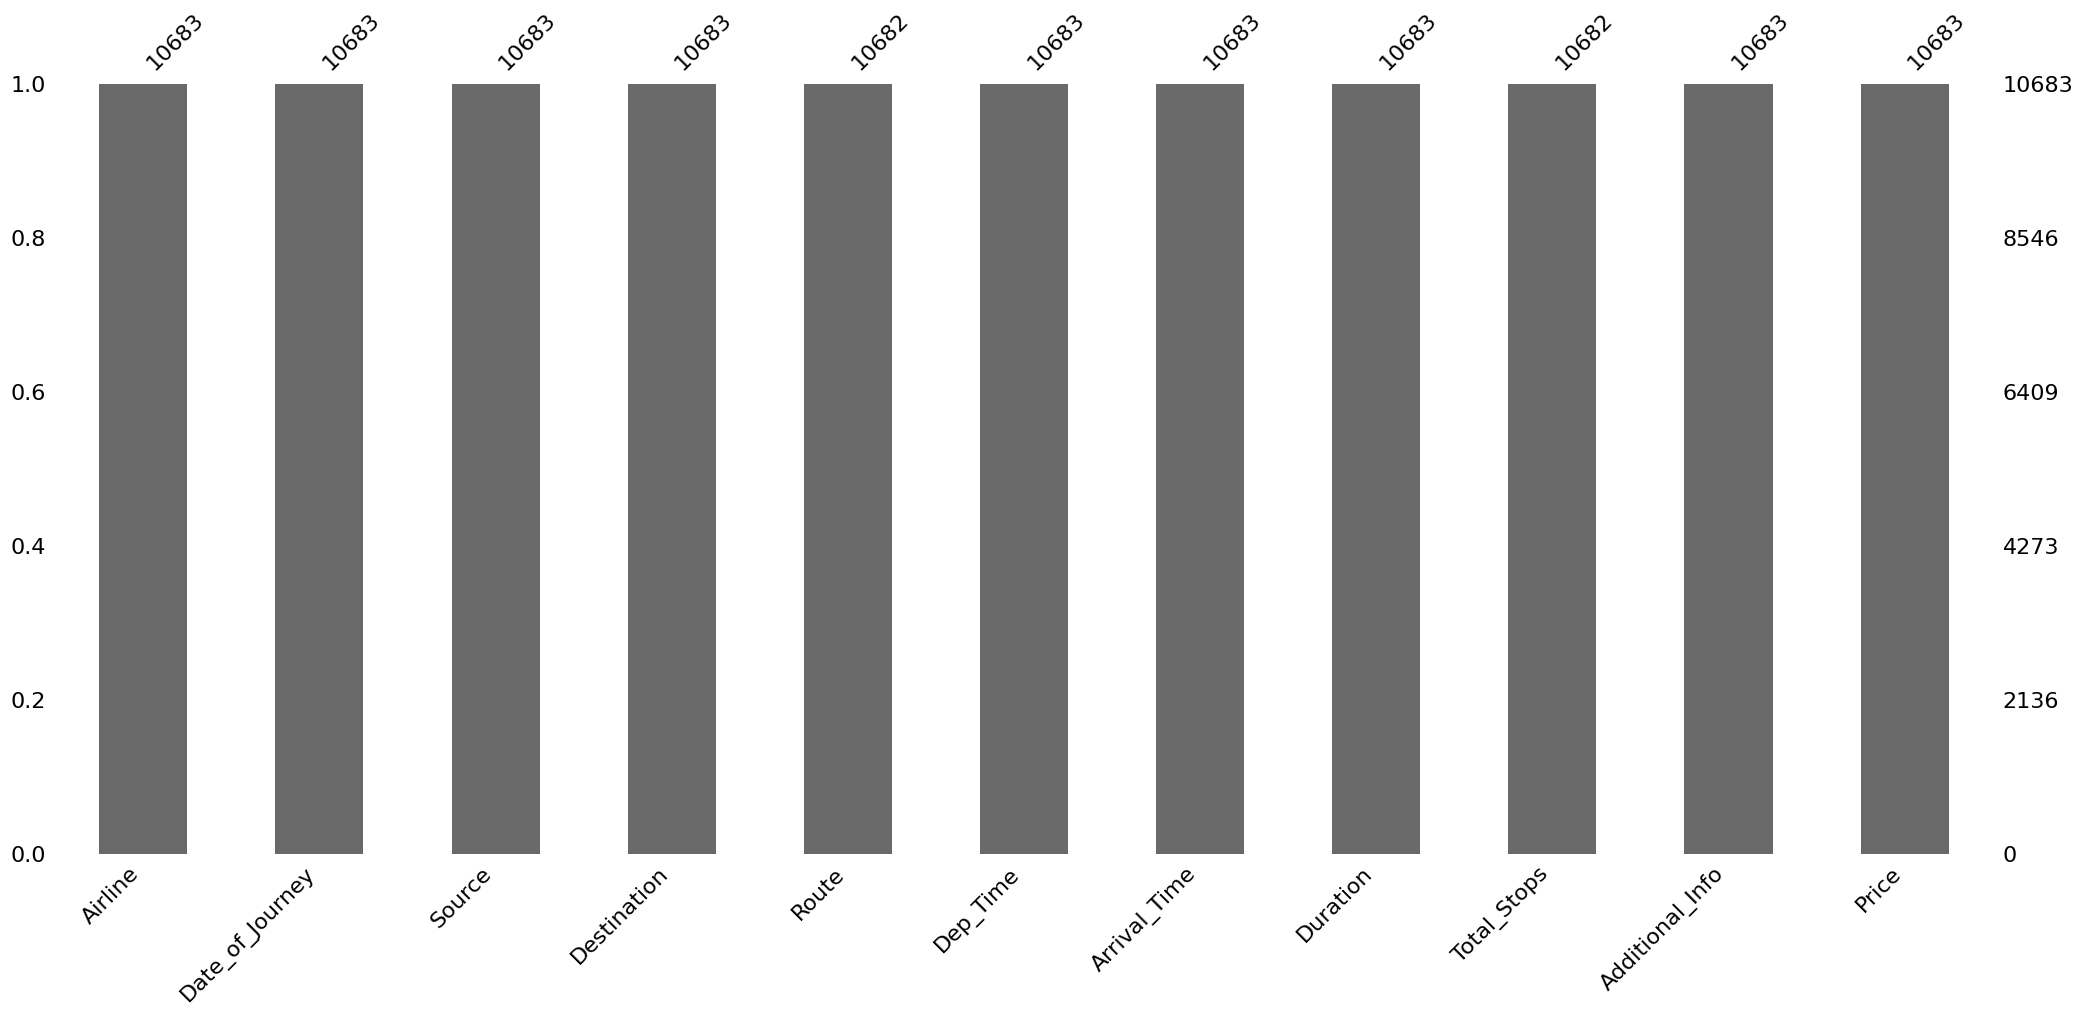

In [11]:
import missingno as msno
msno.bar(df)
plt.show

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


<function matplotlib.pyplot.show(close=None, block=None)>

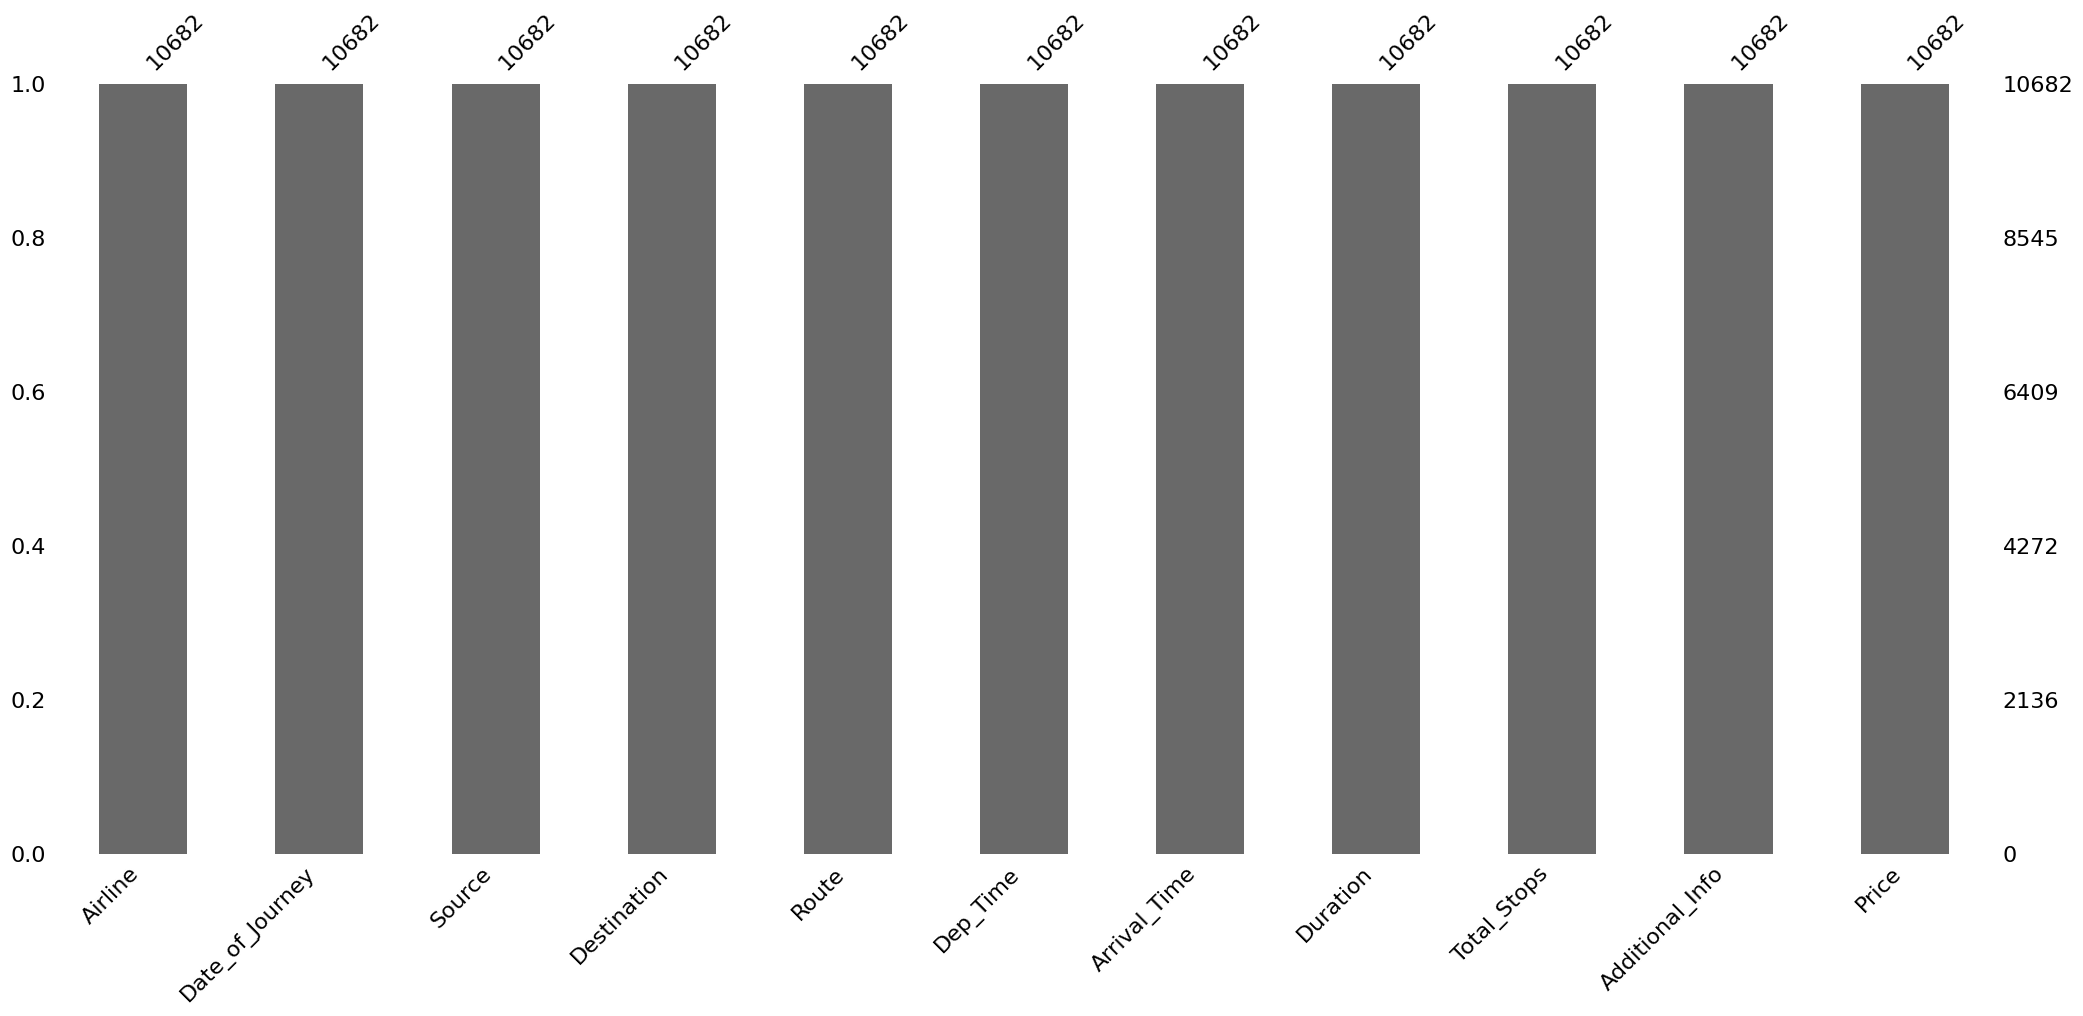

In [14]:
msno.bar(df)
plt.show

In [15]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [16]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [17]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [19]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-07-29 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-07-29 05:50:00,2025-07-29 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-07-29 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-07-29 18:05:00,2025-07-29 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-07-29 16:50:00,2025-07-29 21:35:00,4h 45m,1 stop,No info,13302


In [21]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']= df['Date_of_Journey'].dt.month

In [22]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-07-29 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-07-29 05:50:00,2025-07-29 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-07-29 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-07-29 18:05:00,2025-07-29 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-07-29 16:50:00,2025-07-29 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2025-07-29 09:00:00,2025-07-29 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-07-29 18:55:00,2025-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2025-07-29 08:00:00,2025-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-07-29 08:55:00,2025-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2025-07-29 11:25:00,2025-07-29 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [23]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [24]:
def extract_hour(data, col):
  data[col+'_hour']=data[col].dt.hour

def extract_min(data, col):
  data[col+'_min']=data[col].dt.minute


def drop_col(data, col):
  data.drop(col, axis=1, inplace=True)

In [25]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [26]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [27]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [28]:
duration = list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split(' '))==2 :
    pass
  else:
    if 'h' in duration[i]:
      duration[i] = duration[i] + '0m'
    else:
      duration[i] = '0h' + duration[i]

In [29]:
df['Duration'] = duration

In [30]:
df.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [31]:
df['dur_hour'] = df['Duration'].str.extract(r'(\d+)h')[0]  # hour extraction
df['dur_min'] = df['Duration'].str.extract(r'(\d+)m')[0]  # minute extraction

In [32]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [33]:
drop_col(df, 'Duration')

In [34]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [35]:
df['dur_hour']=df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [36]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [37]:
df['Arrival_Time_min'] = df['Arrival_Time_min'].astype(int)
df['Arrival_Time_hour'] = df['Arrival_Time_hour'].astype(int)
df['journey_day'] = df['journey_day'].astype(int)
df['journey_month'] = df['journey_month'].astype(int)
df['Dep_Time_hour'] =df['Dep_Time_hour'].astype(int)
df['Dep_Time_min'] = df['Dep_Time_min'] .astype(int)

In [38]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int64
journey_month,int64
Dep_Time_hour,int64


In [39]:
column = [column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [40]:
continuous_col = [column for column in df.columns if df[column].dtype !='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [41]:
categorical = df[column]

In [42]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


<Axes: xlabel='Airline', ylabel='Price'>

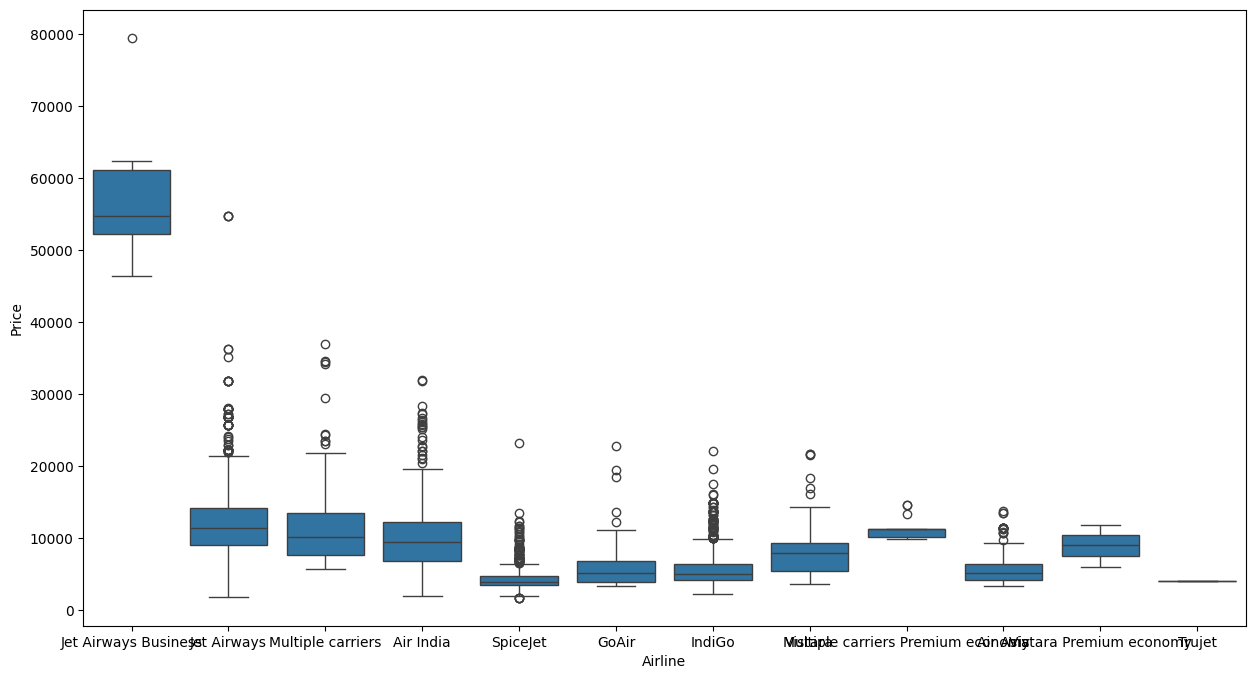

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

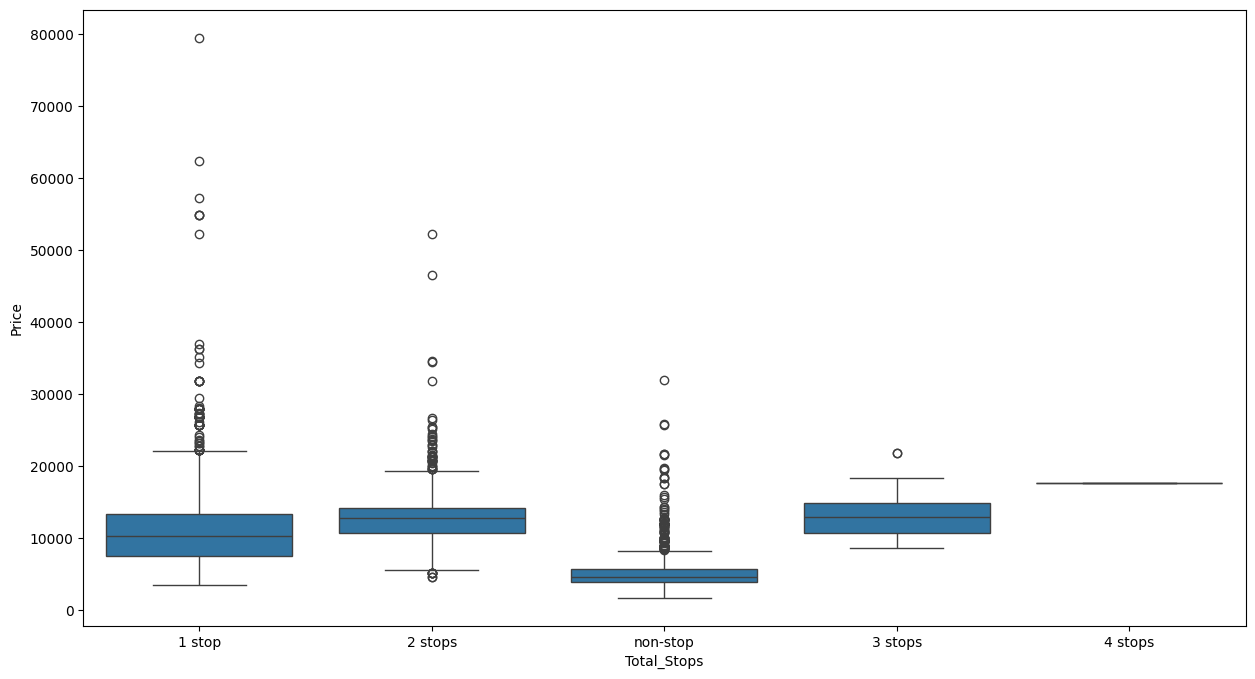

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops', y='Price', data=df.sort_values('Price', ascending=False))

In [46]:
upper_threshold = 70000
median_price = df['Price'].median()
df['Price'] = np.where(df['Price'] > upper_threshold, median_price, df['Price'])

<Axes: xlabel='Airline', ylabel='Price'>

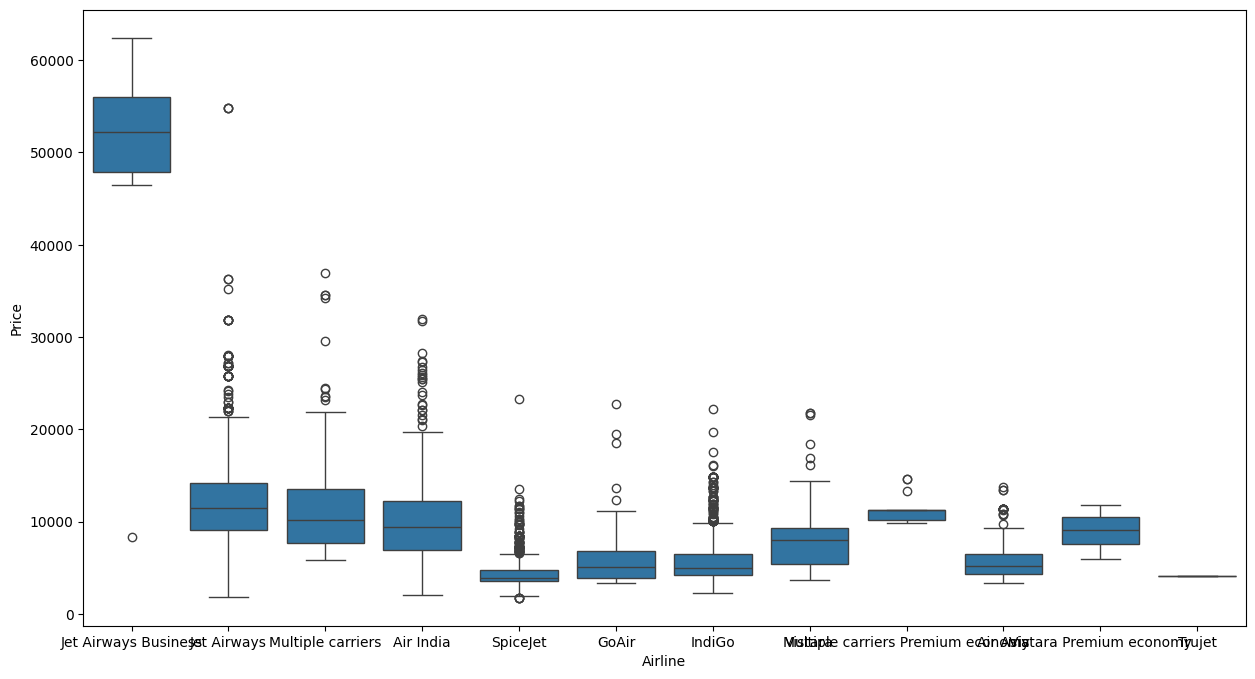

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

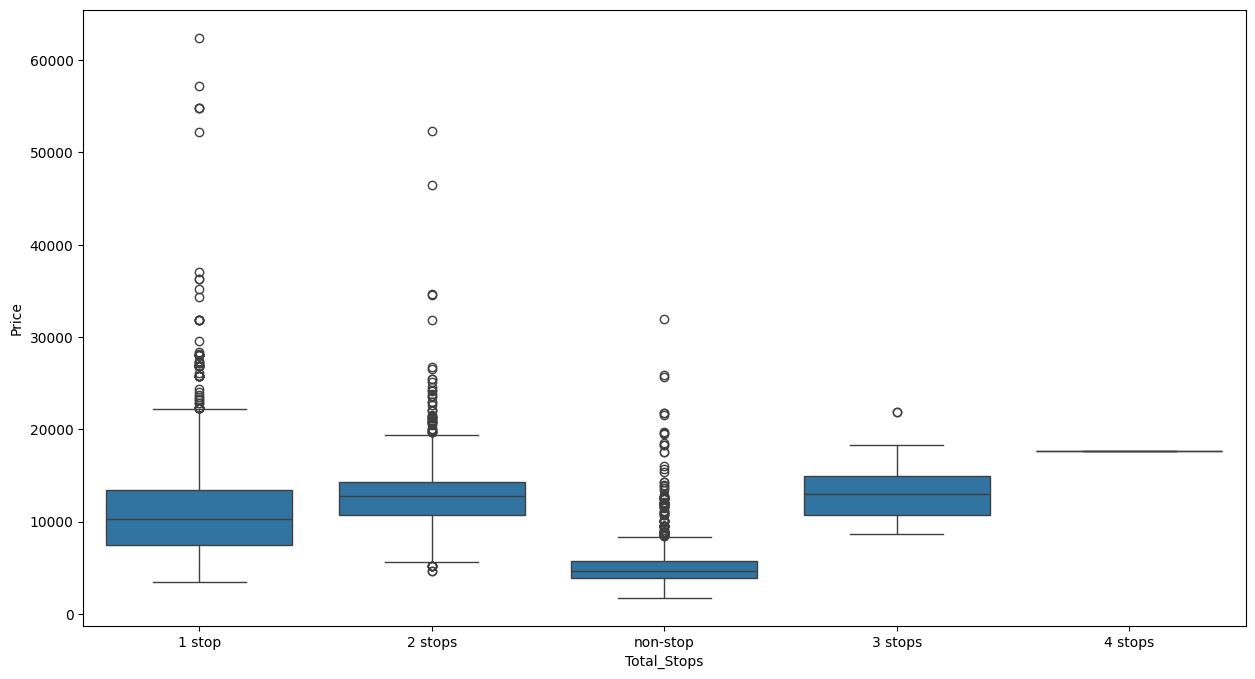

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops', y='Price', data=df.sort_values('Price', ascending=False))

In [49]:
#one-hot encoding for Airline
Airline = pd.get_dummies(categorical['Airline'], drop_first=True).astype(int)

In [50]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [51]:
categorical['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


<Figure size 1500x1500 with 0 Axes>

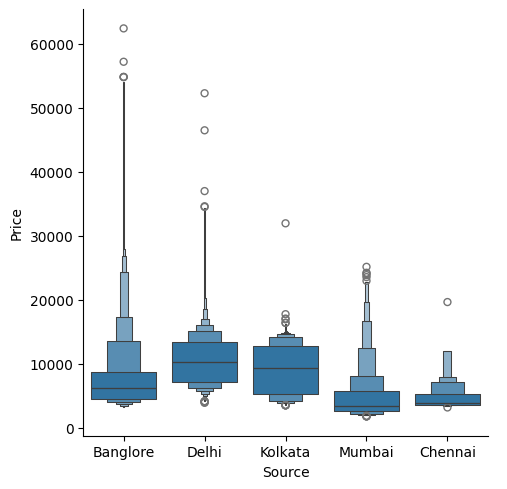

In [52]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen')

In [53]:
source = pd.get_dummies(categorical['Source'], drop_first=True).astype(int)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [54]:
categorical['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


<Axes: xlabel='Destination', ylabel='Price'>

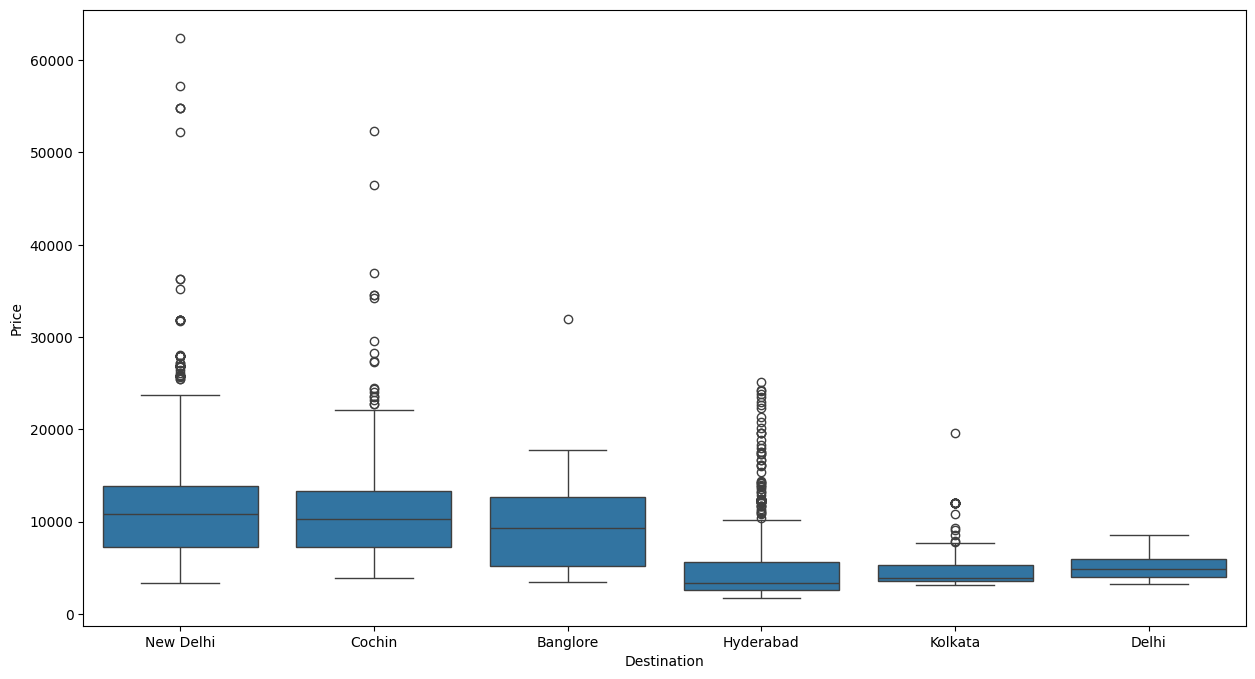

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination', y='Price', data=df.sort_values('Price',ascending=False))

In [56]:
destination = pd.get_dummies(categorical['Destination'],  drop_first=True).astype(int)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [57]:
categorical['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BOM → VNS → DEL → HYD,1
BLR → HBX → BOM → NAG → DEL,1
BLR → BOM → IXC → DEL,1


In [58]:
categorical['Route1'] = categorical['Route'].str.split('→').str[0]
categorical['Route2'] = categorical['Route'].str.split('→').str[1]
categorical['Route3'] = categorical['Route'].str.split('→').str[2]
categorical['Route4'] = categorical['Route'].str.split('→').str[3]
categorical['Route5'] = categorical['Route'].str.split('→').str[4]
categorical['Route6'] = categorical['Route'].str.split('→').str[5]

In [59]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN,NaN


In [60]:
drop_col(categorical, 'Route')

In [61]:
categorical.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,3491
Route4,9116
Route5,10636


In [62]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6'],
      dtype='object')

In [63]:
for i in ['Route3', 'Route4', 'Route5', 'Route6']:
  categorical[i].fillna('None', inplace=True)

In [64]:
categorical.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Route1,0
Route2,0
Route3,0
Route4,0
Route5,0


In [65]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories
Route6 has total 2 categories


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [67]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Route6']:
  categorical[i]=encoder.fit_transform(categorical[i])

In [68]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5,1


<Axes: xlabel='Additional_Info', ylabel='Price'>

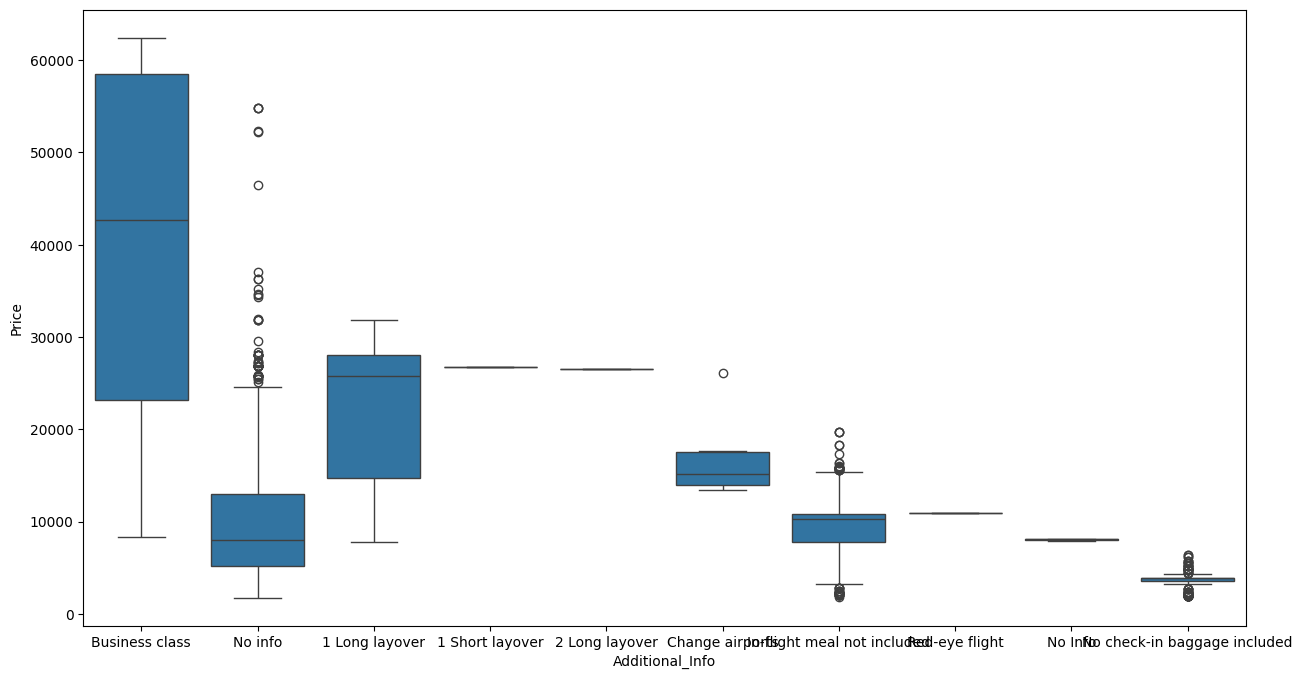

In [69]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending=False))

In [70]:
drop_col(categorical, 'Additional_Info')

In [71]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
dict = {'non-stop':0 , '2 stops':2 , '1 stop':1 , '3 stops':3 , '4 stops':4}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [73]:
categorical['Total_Stops']

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [74]:
drop_col(categorical, 'Source')
drop_col(categorical, 'Destination')
drop_col(categorical, 'Airline')

In [75]:
final_df = pd.concat([categorical, Airline, source, destination, df[continuous_col]], axis=1)

In [76]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Route6,Air India,GoAir,IndiGo,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,1,0,0,1,...,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,...,0,7662.0,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,...,0,13882.0,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,...,0,6218.0,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,...,1,13302.0,1,3,16,50,21,35,4,45


In [78]:
pd.set_option('display.max_columns', 34)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Route6,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662.0,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,13882.0,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218.0,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302.0,1,3,16,50,21,35,4,45


In [83]:
def plot(data, col):
  fig, (ax1,ax2)= plt.subplots(2,1)
  sns.distplot(data[col],ax=ax1)
  sns.boxplot(data[col], ax=ax2, orient='h')

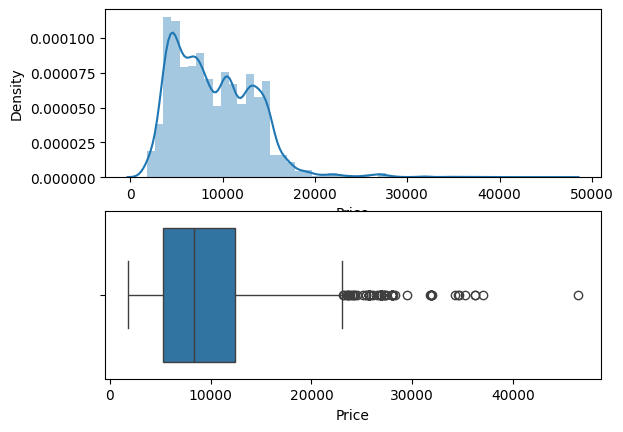

In [84]:
plot(final_df, 'Price')

In [85]:
final_df["Price"]=np.where(final_df['Price']>=40000, final_df['Price'].median(),final_df['Price'])

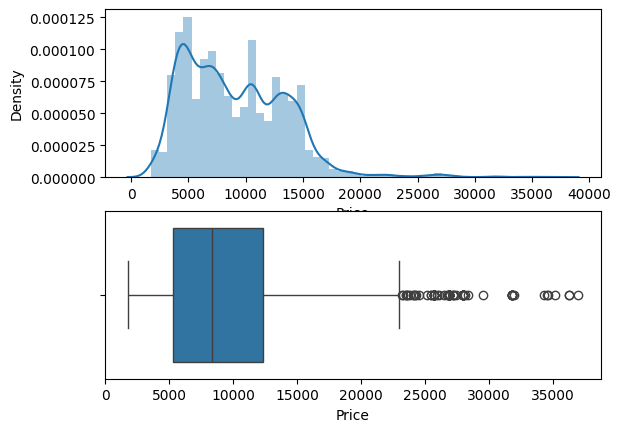

In [86]:
plot(final_df, 'Price')

In [87]:
x=final_df.drop('Price', axis=1)
y=df['Price']

In [88]:
from sklearn.feature_selection import mutual_info_classif

In [89]:
mutual_info_classif(x,y)

array([1.90125382, 2.31061827, 2.99656362, 2.50992873, 1.70020254,
       1.44128271, 1.42377948, 0.70017219, 0.10411126, 0.63689709,
       0.84062489, 0.00903727, 0.51719569, 0.01047082, 0.28979073,
       0.00721047, 0.21916991, 0.        , 0.17280642, 1.38283393,
       0.83141033, 0.2790678 , 1.37102548, 0.39394015, 0.27944647,
       0.17159562, 0.34670211, 0.88488672, 1.64567192, 1.50155502,
       1.2800877 , 1.88468602, 1.61629513, 1.77749777, 1.12518351])

In [90]:
imp = pd.DataFrame(mutual_info_classif(x,y), index=x.columns)
imp

,0
Total_Stops,1.907420
Route1,2.304648
Route2,3.018422
Route3,2.519076
Route4,1.755174
Route5,1.476739
Route6,1.427086
Air India,0.686630
GoAir,0.089042
IndiGo,0.625197


In [92]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route2,3.018422
Route3,2.519076
Route1,2.304648
Arrival_Time_hour,1.925759
Total_Stops,1.907420
dur_hour,1.788142
Route4,1.755174
journey_month,1.680585
Arrival_Time_min,1.616961
Dep_Time_hour,1.528606


In [93]:
imp = imp.loc[imp['importance']>0]
imp = imp.sort_values(by='importance', ascending=False)

In [95]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route2,3.018422
Route3,2.519076
Route1,2.304648
Arrival_Time_hour,1.925759
Total_Stops,1.907420
dur_hour,1.788142
Route4,1.755174
journey_month,1.680585
Arrival_Time_min,1.616961
Dep_Time_hour,1.528606


In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=123)

In [100]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

    sns.distplot(y_test-predictions)


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9515628543802364
Predictions are: [ 8530.7        17343.62       13865.02783333 ...  3825.
  5677.35       10626.712     ]


r2 score is: 0.7954606236060017
MAE:1102.6558003228897
MSE:3938544.2790088067
RMSE:1984.5765994309231


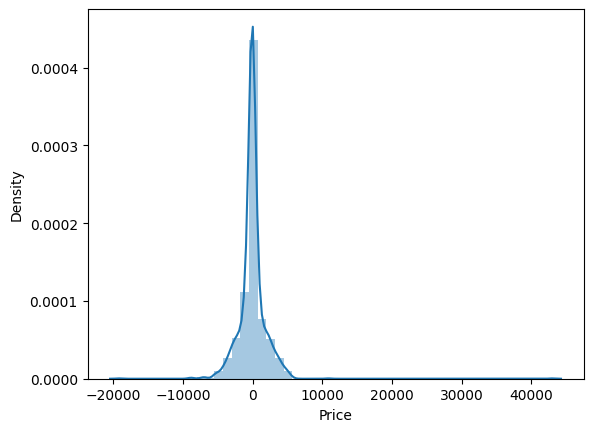

In [102]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.36243417203042716
Predictions are: [14781. 15237. 10844. ...  4226.  6147. 10262.]


r2 score is: 0.3118934747169362
MAE:1970.1160505381376
MSE:13249957.373888629
RMSE:3640.049089488853


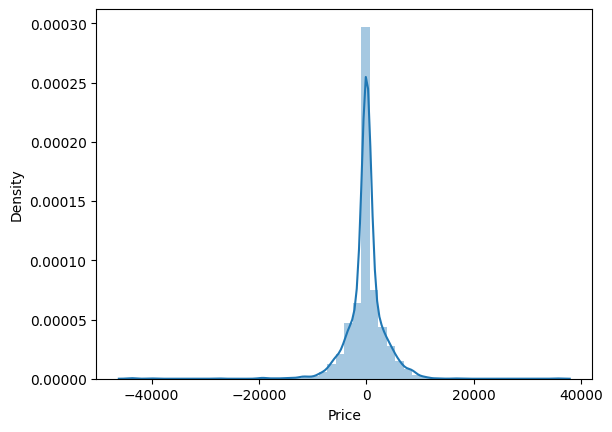

In [103]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7575058970993926
Predictions are: [ 8355.4 16362.4 12933.2 ...  3757.   9073.  11232.4]


r2 score is: 0.6413294309689603
MAE:1653.6050538137576
MSE:6906444.825493684
RMSE:2628.0115725570317


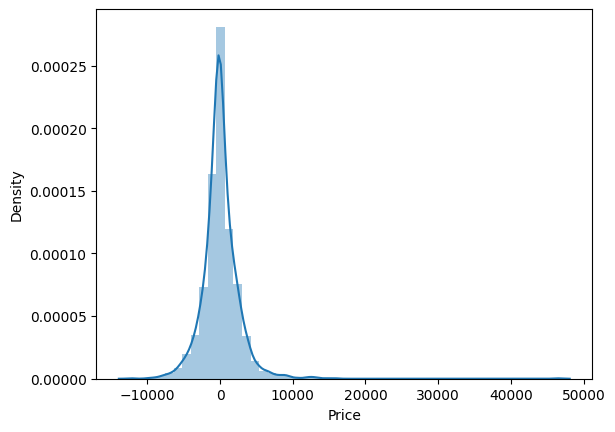

In [104]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9692941809447472
Predictions are: [ 8996. 18550. 14571. ...  3943.  6069. 10262.]


r2 score is: 0.6646432846147713
MAE:1246.1666666666667
MSE:6457520.777140852
RMSE:2541.1652400308117


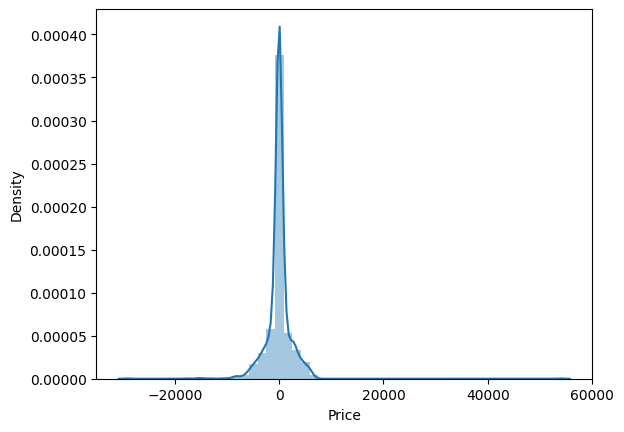

In [105]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.03853794733057214
Predictions are: [8516.44515721 8266.08943593 8451.53992267 ... 8299.19379765 8460.69411685
 8545.090995  ]


r2 score is: 0.052681649022613075
MAE:3327.0524236155275
MSE:18241256.70773054
RMSE:4270.978425107125


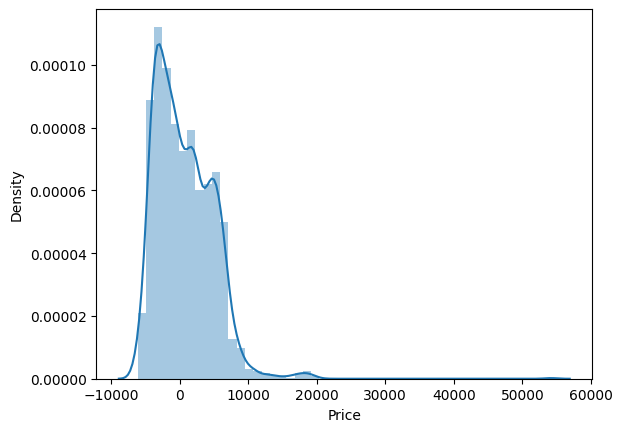

In [106]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.787871879425172
Predictions are: [ 5426.4059669  16645.7167563  12011.18439048 ...  4358.84462547
  6535.84735835 11761.3834874 ]


r2 score is: 0.7885532431055609
MAE:1430.3400483753896
MSE:4071550.570670437
RMSE:2017.8083582616157


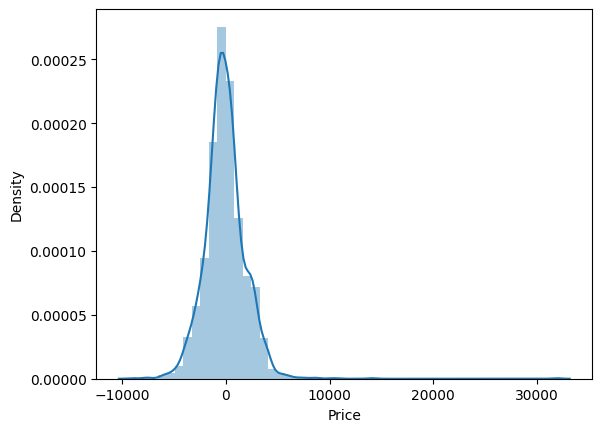

In [107]:
predict(GradientBoostingRegressor())

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [111]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10}

In [112]:
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10}

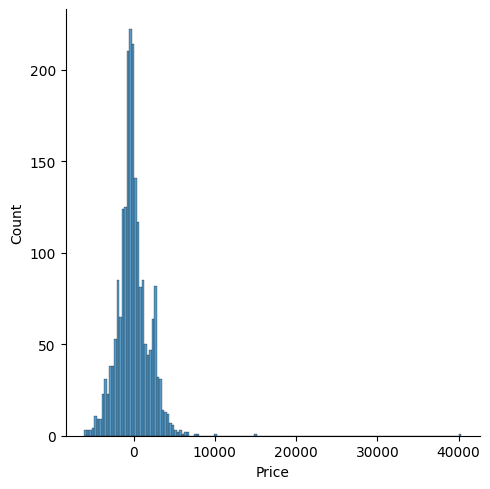

In [114]:
#predicting the values
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [115]:
r2_score(y_test,prediction)

0.7747689721575723